In [389]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import scipy.optimize as sco
import warnings
warnings.filterwarnings("ignore")
%pip install --quiet yfinance
import yfinance as yf
from pandas_datareader import data as pdr
import cvxpy as cp
from scipy.stats import norm
import yfinance as yf
from scipy.optimize import minimize
import scipy.stats as stats
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

PUNTO 1

Escoja 5 acciones que hagan parte del índice Dow Jones (DJI). Con la información
histórica de estas acciones para un periodo de al menos 5 años con periodicidad mensual y
con cierre a Dic-2022:

 a. Estimar los parámetros del modelo de mercado de las cinco acciones y construir un DataFrame donde se resuman los caculos de: retornos esperados (promedio), volatilidades, betas, retornos estimados (CAPM) y el coeficiente de determinación de cada uno.

In [314]:
precios_1=yf.download("HON",start="2017-12-01",end="2022-12-31",interval="1Mo")["Adj Close"]
retornos_1=np.log(precios_1/precios_1.shift()).dropna()

precios_2=yf.download("INTC",start="2017-12-01",end="2022-12-31",interval="1Mo")["Adj Close"]
retornos_2=np.log(precios_2/precios_2.shift()).dropna()

precios_3=yf.download("MRK",start="2017-12-01",end="2022-12-31",interval="1Mo")["Adj Close"]
retornos_3=np.log(precios_3/precios_3.shift()).dropna()

precios_4=yf.download("MSFT",start="2017-12-01",end="2022-12-31",interval="1Mo")["Adj Close"]
retornos_4=np.log(precios_4/precios_4.shift()).dropna()

precios_5=yf.download("V",start="2017-12-01",end="2022-12-31",interval="1Mo")["Adj Close"]
retornos_5=np.log(precios_5/precios_5.shift()).dropna()

p_indice=yf.download("^DJI",start="2017-12-01",end="2022-12-31",interval="1Mo")["Adj Close"]
r_indice=np.log(p_indice/p_indice.shift()).dropna()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- MRK: Exception('Lost data during merge despite all attempts to align data (see above)')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [315]:
##Retornos y Volatilidades
re_1=np.mean(retornos_1)
re_2=np.mean(retornos_2)
re_3=np.mean(retornos_3)
re_4=np.mean(retornos_4)
re_5=np.mean(retornos_5)

sigma_1=np.std(retornos_1)
sigma_2=np.std(retornos_2)
sigma_3=np.std(retornos_3)
sigma_4=np.std(retornos_4)
sigma_5=np.std(retornos_5)


X = r_indice

Y_1 = retornos_1
Y_2 = retornos_2
Y_3 = retornos_3
Y_4 = retornos_4
Y_5 = retornos_5


In [316]:
##CAPM 
CAPM_1= sm.OLS(Y_1, sm.add_constant(X)).fit()
print(CAPM_1.summary()) 

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     242.8
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           2.16e-22
Time:                        03:46:55   Log-Likelihood:                 123.37
No. Observations:                  60   AIC:                            -242.7
Df Residuals:                      58   BIC:                            -238.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0021      0.004      0.524      0.6

In [321]:
CAPM_2 = sm.OLS(Y_2, sm.add_constant(X)).fit()
print(CAPM_2.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     23.73
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           8.95e-06
Time:                        03:47:15   Log-Likelihood:                 75.039
No. Observations:                  60   AIC:                            -146.1
Df Residuals:                      58   BIC:                            -141.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0111      0.009     -1.211      0.2

In [317]:
CAPM_3 = sm.OLS(Y_5, sm.add_constant(X)).fit()
print(CAPM_3.summary()) 

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     92.75
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           1.23e-13
Time:                        03:47:01   Log-Likelihood:                 105.36
No. Observations:                  60   AIC:                            -206.7
Df Residuals:                      58   BIC:                            -202.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0057      0.006      1.032      0.3

In [320]:
CAPM_4 = sm.OLS(Y_4, sm.add_constant(X)).fit()
print(CAPM_4.summary()) 

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     59.29
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           1.95e-10
Time:                        03:47:13   Log-Likelihood:                 103.86
No. Observations:                  60   AIC:                            -203.7
Df Residuals:                      58   BIC:                            -199.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0142      0.006      2.512      0.0

In [318]:
CAPM_5 = sm.OLS(Y_5, sm.add_constant(X)).fit()
print(CAPM_5.summary()) 

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     92.75
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           1.23e-13
Time:                        03:47:03   Log-Likelihood:                 105.36
No. Observations:                  60   AIC:                            -206.7
Df Residuals:                      58   BIC:                            -202.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0057      0.006      1.032      0.3

In [322]:
## Betas y Retornos Estimados 
beta_1 = CAPM_1.params[1]
beta_2 = CAPM_2.params[1]
beta_3 = CAPM_3.params[1]
beta_4 = CAPM_4.params[1]
beta_5 = CAPM_5.params[1]

rf = 0
re_CAPM_1 = re_1 + beta_1 * (r_indice.mean() - rf)
re_CAPM_2 = re_2 + beta_2 * (r_indice.mean() - rf)
re_CAPM_3 = re_3 + beta_3 * (r_indice.mean() - rf)
re_CAPM_4 = re_4 + beta_4 * (r_indice.mean() - rf)
re_CAPM_5= re_5 + beta_5 * (r_indice.mean() - rf)


In [323]:
## Por ultimo coeficientes de determinación 
rcuadrado_1 = CAPM_1.rsquared
rcuadrado_2 = CAPM_2.rsquared
rcuadrado_3 = CAPM_3.rsquared
rcuadrado_4 = CAPM_4.rsquared
rcuadrado_5 = CAPM_5.rsquared

r_esperado_1 = pd.DataFrame({"r_esperado" : [re_1, re_2, re_3, re_4, re_5]})
sigma = pd.DataFrame({"sigma" : [re_1, re_2, re_3, re_4, re_5]})

results = pd.DataFrame({
    "retorno esperado" : [re_1, re_2, re_3, re_4, re_5],
    "sigma" : [sigma_1, sigma_2, sigma_3, sigma_4, sigma_5],
    'Beta': [beta_1, beta_2, beta_3, beta_4, beta_5],
    'Retorno estimado': [re_CAPM_1, re_CAPM_2, re_CAPM_3, re_CAPM_4, re_CAPM_5],
    'Coeficiente de determinación': [rcuadrado_1, rcuadrado_2, rcuadrado_3, rcuadrado_4, rcuadrado_5]
})
acciones = ["HON", "INTC", "MRK", "MSFT", "V"]
results.index = acciones
results.index.name = "Acciones"
results

,retorno esperado,sigma,Beta,Retorno estimado,Coeficiente de determinación
Acciones,,,,,
HON,0.007967,0.070500,1.191450,0.013793,0.807156
INTC,-0.006984,0.082239,0.833532,-0.002908,0.290315
MRK,NaN,NaN,0.994318,NaN,0.615269
MSFT,0.018183,0.060943,0.815054,0.022168,0.505486
V,0.010547,0.067388,0.994318,0.015409,0.615269


b. Construya un plano riesgo-retorno en el que se relacionen los retornos estimados del
CAPM y las betas de los activos.

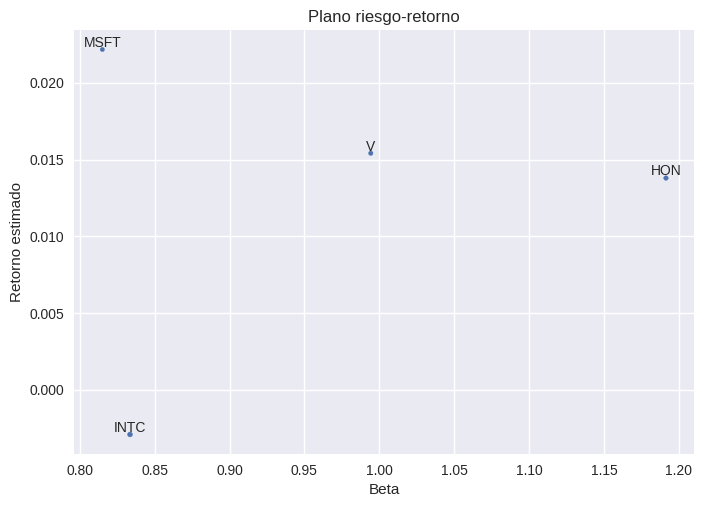

In [324]:

plt.style.use('seaborn')
plt.scatter(results['Beta'], results['Retorno estimado'], s=results['sigma']*150, alpha= 1)

for i, txt in enumerate(results.index):
    plt.annotate(txt, (results['Beta'][i], results['Retorno estimado'][i]), textcoords="offset points", xytext=(0,2), ha='center')

plt.xlabel('Beta')
plt.ylabel('Retorno estimado')
plt.title('Plano riesgo-retorno')

plt.show()

PUNTO 2 

2. Escoja 5 acciones que hagan parte del índice Dow Jones (DJI). Con la información
histórica de estas acciones para un periodo de al menos 5 años con periodicidad mensual y
con cierre a Dic-2022, construya el portafolio óptimo tangente (máximo ratio de Sharpe).
a. Presentar el grafico de pesos y sus medidas de retorno esperado y volatilidad. Nota:
tomar solo posiciones largas en el portafolio.


In [325]:
## precios de cierres ajustados 
acciones_1 = ["INTC", "STBX", "GS", "CAT","CVX"]
precios = yf.download(acciones_1, start="2017-12-01", end="2022-12-31", interval="1mo")["Adj Close"]


[*********************100%***********************]  5 of 5 completed


In [326]:
##Retornos logaritmicos 
retornos_1= np.log(precios / precios.shift(1)).dropna()

In [327]:
##Matriz Covarianza 
cov_1 = retornos_1.cov()

In [328]:
##Ratio de sharpe 
def ratio_sharpe(pesos, retornos, cov):
    retorno_1 = np.dot(retornos.mean(), pesos) * 12
    volatilidad_1 = np.sqrt(np.dot(pesos.T, np.dot(cov, pesos))) * np.sqrt(12)
    ratio_sharpe = retorno_1 / volatilidad_1
    return -ratio_sharpe

In [329]:
##Optimización ( Restricciones)
bounds_1 = [(0, 1) for i in range(len(acciones))]
constraints_1 = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

In [330]:
#Solución 
pesos_1 = np.array([1 / len(acciones) for i in range(len(acciones))])
resultado =minimize(ratio_sharpe, pesos_1, args=(retornos_1, cov_1), method='SLSQP', bounds=bounds_1, constraints=constraints_1)

In [331]:
##Pesos Optimos 
pesos_optimos_1 = resultado.x

In [332]:
##Rentabilidad Esperada y Volatilidad 
expected_return = np.dot(retornos_1.mean(), pesos_optimos_1) * 12
expected_volatility = np.sqrt(np.dot(pesos_optimos_1.T, np.dot(cov_1, pesos_optimos_1))) * np.sqrt(12)

In [333]:
## Retorno esperado y matriz de covarianza (Portafolio)
mu_p_1 = np.dot(retornos_1.mean(), pesos_optimos_1)
sigma_p = np.sqrt(np.dot(np.dot(pesos_optimos_1.T, cov_1), pesos_optimos_1))

In [334]:
## VAR Nviel de confianza 95% y 99% 
alpha_1 = 0.95
z_alpha = norm.ppf(alpha_1)
VaR_95 = -mu_p_1 - z_alpha*sigma_p

alpha_2 = 0.99
z_alpha = norm.ppf(alpha_2)
VaR_99 = -mu_p_1 - z_alpha*sigma_p

In [335]:
print("VaR al 95% de confianza:", VaR_95)
print("VaR al 99% de confianza:", VaR_99)

VaR al 95% de confianza: -0.13280509729962162
VaR al 99% de confianza: -0.1488081731085295


PUNTO 3

a. Escoja una acción de su preferencia. Con la información histórica con cierre a Dic-2022,
estime los parámetros μ y σ. Utilice el método de Monte Carlo para generar una muestra
aleatoria de 10.000 posibles valores del precio del activo en el instante t = 1. Presente
gráficamente las primeras 20 trayectorias del proceso.

In [ ]:
activos = ['META']
precios = yf.download(activos, end='2022-12-31', interval='1Mo')['Adj Close']
retornos = np.log(precios/precios.shift()).dropna()
mu = retornos.mean()*12
sigma = retornos.std()*np.sqrt(12)

In [ ]:
def PathsGBM(S0,mu,sigma,T,NS,M):    
    Z = np.random.normal(0.0,1.0,[NS,M])
    S = np.zeros([NS, M+1])
    S[:,0] = S0
    dt = T / M
    for t in range(0,M):
        S[:,t+1] = S[:,t] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) *Z[:,t])
    return S

T = 1 # Un Año
S0  = precios [-1]
NS = 10000 
M = 12 
St = PathsGBM(S0,mu,sigma,T,NS,M)

plt.plot(np.transpose(St))
plt.xlabel("Tiempo")

b. Construya el histograma de los precios y retornos al final del periodo (t = 1). ¿qué puede
concluir de la forma de los histogramas?

In [ ]:
precio3_final = St[:,-1]
retorno3_final = St[:,-1]

plt.hist(precio3_final, bins=20)
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Histograma de precios al final del periodo (t=1)')
plt.show()

plt.hist(retorno3_final, bins=20)
plt.xlabel('Retorno')
plt.ylabel('Frecuencia')
plt.title('Histograma de retornos al final del periodo (t=1)')
plt.show()

c. Demuestre que el valor del precio simulado de la acción en T converge a ST exp{μ T}.

In [ ]:
print(S0 * np.exp(mu * T)) 
print(St[:,-1].mean())


d. Calcule la probabilidad de que el precio de la acción sea inferior a S0.

In [ ]:
print("La probabilidad de que el precio de la acción sea inferior a S0 es", len(St[:,-1][St[:,-1]<S0])/NS)

PUNTO 4

4. Un tipo de proceso estocástico asociados al movimiento Browniano y que se utilizan
ampliamente en finanzas son los llamados procesos de reversión a la media. Dentro de
estos se encuentra el proceso Ornstein-Uhlenbeck, que es un proceso Xt que satisface:

Xt+dt = Xt + (μ–Xt)dt + σ(Wt+dt − Wt)

a. Utilice el método de Monte Carlo para realizar una simulación de 10000 posibles
trayectorias (NS) de este proceso considerando los siguientes valores: X0 = 1, μ = 3, σ = 0. 3, T = 5, NS = 100, dt = T/m. Presente gráficamente los resultados para las primeras
10 trayectorias del proceso.


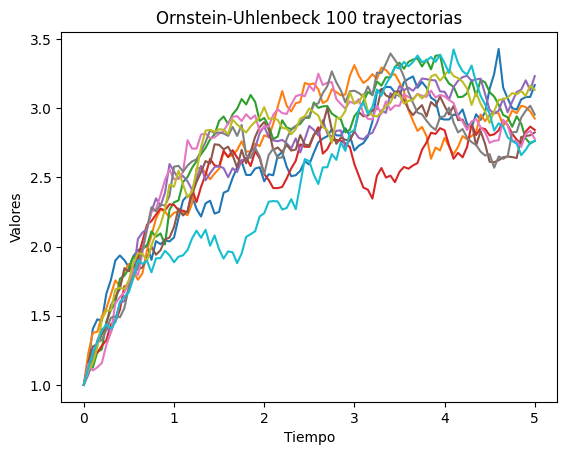

In [ ]:
# Parámetros
t0 = 1
mu = 3
sigma = 0.3
T = 5
NS = 100
m = 100
dt = T/m

def OrnsteinUhlenbeck(X0, mu, sigma, T, dt):
    N = round(T/dt) # simulaciones
    t = np.linspace(0, T, N+1) #Discreto
    X = np.zeros(N+1) #V de ceros
    X[0] = X0 
    for i in range(N):
        dW = np.random.normal(0, np.sqrt(dt)) 
        X[i+1] = X[i] + (mu-X[i])*dt + sigma*dW
    return  t, X

trayectorias = []
for i in range(NS):
    _, X = OrnsteinUhlenbeck(t0, mu, sigma, T, dt)
    trayectorias.append(X)

for i in range(10): 
    plt.plot(np.linspace(0, T, m+1), trayectorias[i])
plt.xlabel('Tiempo')
plt.ylabel('Valores')
plt.title('Ornstein-Uhlenbeck 100 trayectorias')
plt.show()


b. A partir de los observado en las simulaciones realizadas en el punto anterior, ¿qué puede
concluir acerca del valor esperado y la varianza del proceso Ornstein-Uhlenbeck en el largo
plazo?

c. De acuerdo con la ecuación 1, ¿cuál es la distribución de probabilidad del proceso
Ornstein-Uhlenbeck?

In [ ]:
dW = np.random.normal(0, np.sqrt(dt))
dW
##  la distribución de probabilidad del proceso Ornstein-Uhlenbeck?

-0.22918610196591627

D. El proceso Ornstein-Uhlenbeck se suelen utilizar para modelar la dinámica de la tasa corta de interés. Por ejemplo, si rt denota el valor de la tasa corte de interés en el mercado, esta se puede modelar como:

rt+dt = rt + (μ– rt)dt + σ(Wt+dt − Wt)

Teniendo en cuenta los siguientes parámetros: r0 = 0. 03, μ = 0. 05, σ = 0. 15, T = 1, NS = 100, dt = T/m; simule 100 posibles valores de la tasa de corta en el instante T = 1, y utilice el valor promedio obtenido para valorar un bono cero cupón y facial 100 con vencimiento en T. Presente gráficamente los resultados para las primeras 10 trayectorias del proceso.

In [ ]:
# Parámetros
r0 = 0.03
mu = 0.05
sigma = 0.15
T = 1
NS = 100
dt = T / NS

rT = np.zeros(NS)
for j in range(100):
    r = r0
    for i in range(NS):
        dW = np.random.normal(0, np.sqrt(dt))
        r = r + mu * dt + sigma * dW
    rT[j] = r


In [ ]:
bono=100/(1+rT[j])**T
print('El precio del bono cero cupón es:', bono)

El precio del bono cero cupón es: 83.60429143780738


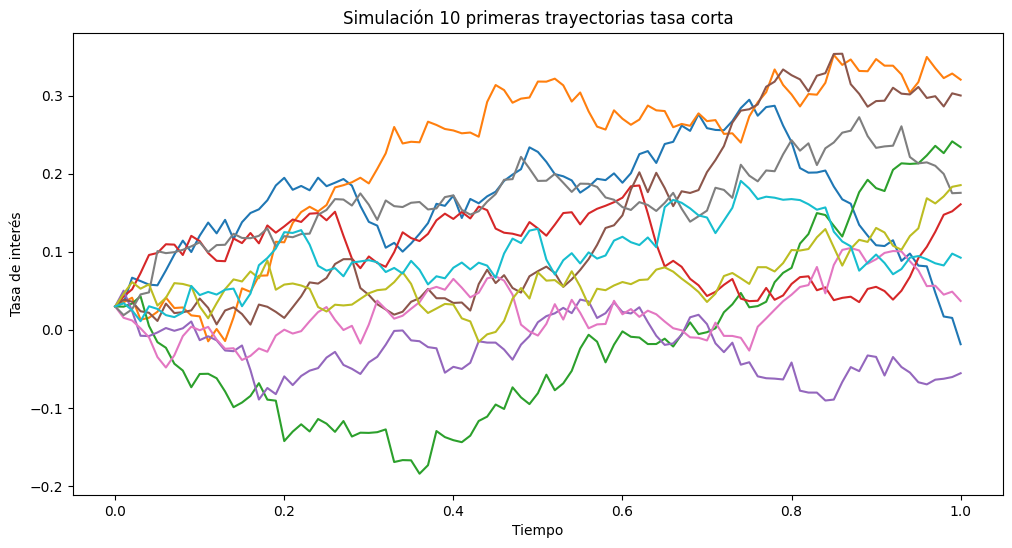

In [ ]:
plt.figure(figsize=(12,6))
for j in range(10):
    r = r0
    r_plot = [r0]
    for i in range(NS):
        dW = np.random.normal(0, np.sqrt(dt))
        r = r + mu * dt + sigma * dW
        r_plot.append(r)
    plt.plot(np.arange(NS+1)*dt, r_plot)
plt.xlabel('Tiempo')
plt.ylabel('Tasa de interés')
plt.title('Simulación 10 primeras trayectorias tasa corta')
plt.show()

PUNTO 5

5. Escoja tres de los siguientes activos.


* Gold futures (GC=F)
* Brent Oil futures (BZ=F)
* US Treasury Bill (^IRX)
* EURUSD currency (EURUSD=X)
* GBPUSD currency (GBPUSD=X)
* Coffee futures (KC=F)
* Natural gas (NG=F)
* Cooper (HG=F)

Con la información de las series históricas para el periodo 2005-01-01 a 2022-12-31 con
periodicidad mensual, construya 100 trayectorias o simulaciones para cada serie para el año 2023. Para este ejercicio tenga en cuenta que las series pueden seguir un proceso estocástico tipo MGB o de reversión a la media tipo OU.

a. La gráfica de las series históricas de los precios

[*********************100%***********************]  3 of 3 completed


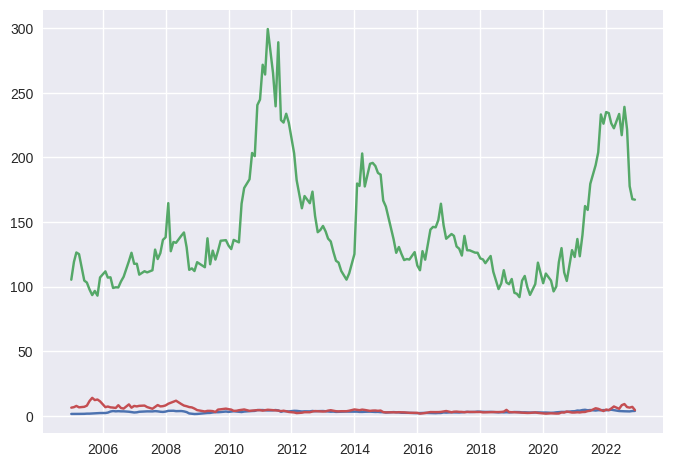

In [361]:
activos5 = ["NG=F","KC=F", "HG=F"] 
precios5 = yf.download(activos5, start="2005-01-01",end="2022-12-31",interval="1Mo")['Adj Close']
retornos5 = np.log(precios5/precios5.shift()).dropna()

plt.plot(precios5)

b. Los resultados de las pruebas de estacionariedad de Dickey-Fuller (ADF)

In [380]:
import statsmodels.api as sm
#from statsmodels.tsa.api import acf, pacf, graphics
#from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [381]:
pruebadf1 = adfuller(precios5["KC=F"]) 
print("ADF test: %f" % pruebadf1[0])
print("P-value: %f" % pruebadf1[1])
print("Citical values:")
for key, value in pruebadf1[4].items():
  print("\t%s: %f" %(key,value))

ADF test: -3.329256
P-value: 0.013620
Citical values:
	1%: -3.467420
	5%: -2.877826
	10%: -2.575452


In [382]:
pruebadf1 = adfuller(precios5["NG=F"]) 
print("ADF test: %f" % pruebadf1[0])
print("P-value: %f" % pruebadf1[1])
print("Citical values:")
for key, value in pruebadf1[4].items():
  print("\t%s: %f" %(key,value))

ADF test: -3.157328
P-value: 0.022591
Citical values:
	1%: -3.468280
	5%: -2.878202
	10%: -2.575653


In [384]:
pruebadf1 = adfuller(precios5["HG=F"]) 
print("ADF test: %f" % pruebadf1[0])
print("P-value: %f" % pruebadf1[1])
print("Citical values:")
for key, value in pruebadf1[4].items():
  print("\t%s: %f" %(key,value))

ADF test: -3.058196
P-value: 0.029806
Citical values:
	1%: -3.466598
	5%: -2.877467
	10%: -2.575260


La pruebas nos idican que estos modelos son estacionarios por ende utilizamos Geometric Brownian motion (GBM)

In [386]:
def PathsGBM(S0,mu,sigma,T,NS,M):    
    Z = np.random.normal(0.0,1.0,[NS,M]) #el choque con normal estandar, NS es # trayectorias y M es la particion
    S = np.zeros([NS, M+1])
    S[:,0] = S0 #S0 es el precio inicial
    dt = T / M 
    for t in range(0,M):
        S[:,t+1] = S[:,t] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) *Z[:,t])
    return S

Text(0.5, 0, 'Tiempo')

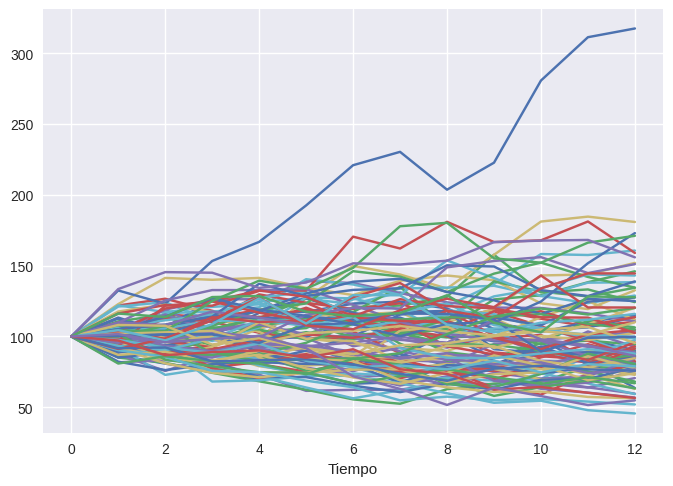

In [391]:
T = 1 
mu = retornos5['KC=F'].mean()
sigma = retornos5['KC=F'].std()*np.sqrt(12)
S0 = 100
NS = 100
M = 12 
St = PathsGBM(S0,mu,sigma,T,NS,M)
plt.plot(np.transpose(St)) 
plt.xlabel("Tiempo")

In [ ]:
T = 1 
mu = retornos5['HG=F'].mean()
sigma = retornos5['HG=F'].std()*np.sqrt(12)
S0 = 100
NS = 100
M = 12 
St = PathsGBM(S0,mu,sigma,T,NS,M)
plt.plot(np.transpose(St)) 
plt.xlabel("Tiempo")

In [ ]:
T = 1 
mu = retornos5['NG=F'].mean()
sigma = retornos5['NG=F'].std()*np.sqrt(12)
S0 = 100
NS = 100
M = 12 
St = PathsGBM(S0,mu,sigma,T,NS,M)
plt.plot(np.transpose(St)) 
plt.xlabel("Tiempo")